Authentication

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzipping the Datasets

In [ ]:
!unzip '/content/drive/MyDrive/FYP Project/GoodDatasets.zip'
print('done')

First we import all the necessary libraries

In [92]:
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense

Now we set the path for the datasets and also set the image details. Here, we have used custom made dataset which has already been divided into train, test and validation sets so we don't need to use the validation split here.

In [93]:
img_width, img_height = 32, 32

train_dir = 'GoodDatasets/training'
val_dir = 'GoodDatasets/validation'
nb_train_samples = 4000
nb_val_samples = 400
epochs = 25
batch_size = 8

The RGB values are in the range between 0-255 and this is not ideal for for a neural network. So, we will set the value between 0-1.

In [94]:
train_datagen = ImageDataGenerator(rescale = 1. / 255,)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

Now, we read the datasets

In [95]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size = batch_size, class_mode ='categorical')

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size =(img_width, img_height),
    batch_size = batch_size, class_mode ='categorical')

Found 4000 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


In [96]:
test_data = 'GoodDatasets/testing'

test_datagen = ImageDataGenerator(
    rescale=1./255
)

testing_generator = test_datagen.flow_from_directory(test_data,
                                                    target_size =(img_width, img_height),
                                                    batch_size = batch_size,
                                                     shuffle=False,
                                                    class_mode ='categorical')

Found 394 images belonging to 10 classes.


Now we create a model on which we train our datasets.

In [97]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape = (img_width, img_height,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size =(2, 2)))

model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                           min_delta=0, patience=5,
                                           verbose=1, mode='auto',
                                           restore_best_weights=True)

In [98]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                460864    
_________________________________________________________________
activation_25 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

lets look at our classes

In [99]:
train_generator.class_indices

{'Afganistan': 0,
 'America': 1,
 'Argentina': 2,
 'Bangladesh': 3,
 'Bhutan': 4,
 'India': 5,
 'Maldives': 6,
 'Nepal': 7,
 'Pakistan': 8,
 'SriLanka': 9}

Here, we are using the Adam optimizer and also using categorical croeesntropy as we are dealing with multiclass.

In [100]:
model1.compile(loss ='categorical_crossentropy',
              optimizer ='adam',
              metrics =['accuracy'])

In [101]:
data = model1.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    validation_data=val_generator,
    epochs=epochs,
    callbacks = [monitor],
    validation_steps = nb_val_samples // batch_size
)

model1.save('data.h5')

Epoch 1/25
500/500 [==============================] - 7s 13ms/step - loss: 1.5684 - accuracy: 0.4944 - val_loss: 0.9205 - val_accuracy: 0.7350
Epoch 2/25
500/500 [==============================] - 6s 13ms/step - loss: 0.6742 - accuracy: 0.7992 - val_loss: 0.7218 - val_accuracy: 0.7700
Epoch 3/25
500/500 [==============================] - 6s 12ms/step - loss: 0.5124 - accuracy: 0.8550 - val_loss: 0.6458 - val_accuracy: 0.8075
Epoch 4/25
500/500 [==============================] - 6s 12ms/step - loss: 0.3477 - accuracy: 0.9042 - val_loss: 0.6542 - val_accuracy: 0.7975
Epoch 5/25
500/500 [==============================] - 6s 12ms/step - loss: 0.2819 - accuracy: 0.9217 - val_loss: 0.6780 - val_accuracy: 0.7900
Epoch 6/25
500/500 [==============================] - 6s 13ms/step - loss: 0.1826 - accuracy: 0.9507 - val_loss: 0.7694 - val_accuracy: 0.7700
Epoch 7/25
500/500 [==============================] - 6s 12ms/step - loss: 0.1563 - accuracy: 0.9632 - val_loss: 0.6753 - val_accuracy: 0.8000

Here, we can see that the training set is too much perfect which is also not a good sign. When the model gets a small number of data, it starts to read the unexpected details of the images and starts to lack its knowledge to predict real life images. Here the model becomes fully dependent upon the train sets and becomes unable to recognize images outside of the training set.

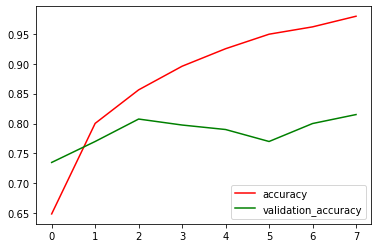

In [102]:
plt.plot(data.history['accuracy'],c='r',label='accuracy')
plt.plot(data.history['val_accuracy'],c='g',label='validation_accuracy')
plt.legend(loc='lower right')
plt.show()

We try to predict Real life image this model.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


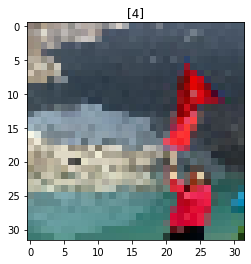

Classified: Bhutan


In [103]:
from tensorflow.keras.preprocessing import image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model

image_path="SS_01.png"
img = image.load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model1.predict_classes(img)
plt.title(result)
plt.show()

if result ==[0]:
    print("Classified: Afganistan")
elif result ==[1]:
    print("Classified: America")
elif result ==[2]:
    print("Classified: Argentina")
elif result ==[3]:
    print("Classified: Bangladesh")
elif result ==[4]:
    print("Classified: Bhutan")
elif result ==[5]:
    print("Classified: India")
elif result ==[6]:
    print("Classified: Maldives")
elif result ==[7]:
    print("Classified: Nepal")
elif result ==[8]:
    print("Classified: Pakistan")
else:
    print("Classified: SriLanka")

Now, we can remove overfitting with various ways, for now we are using Data Augmentation and add Dropout to our model.

We are using the Data Augmentation Here.

In [104]:
train_aug = ImageDataGenerator(
    shear_range = 0.2,
    rotation_range = 90,
    brightness_range=[0.3,0.9],
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)

Selecting Random Image

In [105]:
import os
import random
random_gen = random.choice(os.listdir('GoodDatasets/training/Nepal'))

In [106]:
image_path = 'GoodDatasets/training/Nepal/' + random_gen
assert os.path.isfile(image_path)

Visualizing the random image

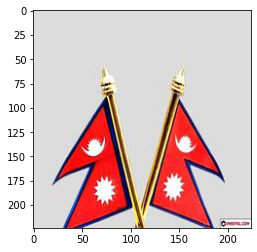

In [107]:
import numpy as np
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

function for plotting multiple images.

In [108]:
def plotImages(images_arr):
  flg, axes = plt.subplots(1, 10,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Visualizing Augmented images.

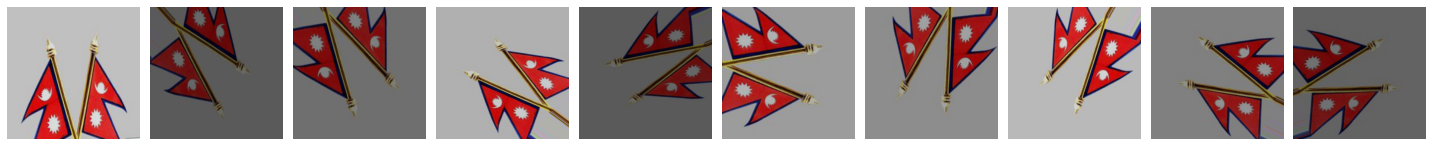

In [109]:
aug_iter = train_aug.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
plotImages(aug_images)

The RGB values are in the range between 0-255 and this is not ideal for for a neural network. So, we will set the value between 0-1. This will be done by calling the rescale method along with image augmentation.

In [110]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.8,
    shear_range=0.2,
    horizontal_flip = True,
    )

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

Flow from directory gathers all the images from inside the directories and also implements the data augmentation to all the images it finds. Here, it has found 4000 images for the training sets and 400 image for validation set.

In [111]:
training_generator = training_datagen.flow_from_directory(train_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    class_mode ='categorical')

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size =(img_width, img_height),
    batch_size = batch_size, class_mode ='categorical')

Found 4000 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


Now we will create a model with including the dropout layer.

In [112]:
model2 = Sequential()
model2.add(Conv2D(16, (3, 3), input_shape = (img_width,img_height,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size =(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size =(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size =(2, 2)))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10))
model2.add(Activation('softmax'))

monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [113]:
model2.compile(loss ='categorical_crossentropy',
              optimizer ='adam',
              metrics =['accuracy'])

Now we will train our model with the datsets

In [114]:
final_data = model2.fit(training_generator,
                 steps_per_epoch = nb_train_samples // batch_size,
                 epochs = 25, callbacks=[monitor], validation_data = validation_generator,
                 validation_steps = nb_val_samples // batch_size)
model2.save('today.h5')
len(final_data.history['loss'])

Epoch 1/25
500/500 [==============================] - 10s 19ms/step - loss: 1.9074 - accuracy: 0.3090 - val_loss: 0.8251 - val_accuracy: 0.7625
Epoch 2/25
500/500 [==============================] - 9s 18ms/step - loss: 0.9855 - accuracy: 0.6753 - val_loss: 0.6596 - val_accuracy: 0.7750
Epoch 3/25
500/500 [==============================] - 9s 18ms/step - loss: 0.9144 - accuracy: 0.7166 - val_loss: 0.5799 - val_accuracy: 0.8100
Epoch 4/25
500/500 [==============================] - 9s 18ms/step - loss: 0.8472 - accuracy: 0.7312 - val_loss: 0.5554 - val_accuracy: 0.8225
Epoch 5/25
500/500 [==============================] - 9s 18ms/step - loss: 0.7198 - accuracy: 0.7633 - val_loss: 0.5242 - val_accuracy: 0.8175
Epoch 6/25
500/500 [==============================] - 9s 18ms/step - loss: 0.6980 - accuracy: 0.7821 - val_loss: 0.5171 - val_accuracy: 0.8225
Epoch 7/25
500/500 [==============================] - 9s 18ms/step - loss: 0.6244 - accuracy: 0.7997 - val_loss: 0.5150 - val_accuracy: 0.830

20

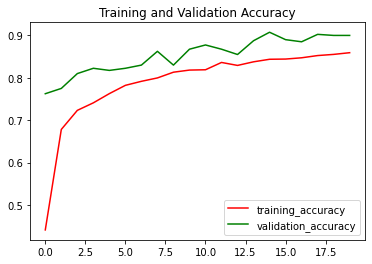

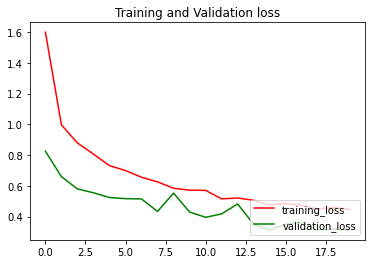

In [115]:
plt.plot(final_data.history['accuracy'],c='r',label='training_accuracy')
plt.plot(final_data.history['val_accuracy'],c='g',label='validation_accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(final_data.history['loss'],c='r',label='training_loss')
plt.plot(final_data.history['val_loss'],c='g',label='validation_loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')
plt.show()

Visualizing the results

Now we can see that the results have gone better than before after adding data augmentation and dropout layer. Now, the overfitting have been reduced by a noticable margin

Evaluating the model

In [116]:
saved_model_path = 'today.h5'
saved_model = load_model(saved_model_path)

train_evaluate=saved_model.evaluate(training_generator)
validation_evaluate=saved_model.evaluate(validation_generator)

50/50 [==============================] - 1s 11ms/step - loss: 0.3138 - accuracy: 0.9075


Printing the accuracies

In [117]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(train_evaluate[1]*100,train_evaluate[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(validation_evaluate[1]*100,validation_evaluate[0]))

Training Accuracy  : 85.87%     Training loss  : 0.429379
Validation Accuracy: 90.75%     Validation loss: 0.313840


Making Predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


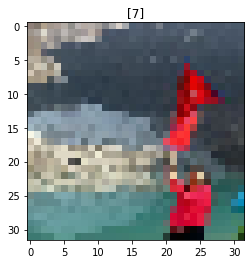

Classified: Nepal


In [118]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model

model_path='today.h5'
data1=load_model(model_path)

image_path="SS_01.png"
img = image.load_img(image_path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=data1.predict_classes(img)
plt.title(result)
plt.show()

if result ==[0]:
    print("Classified: Afganistan")
elif result ==[1]:
    print("Classified: America")
elif result ==[2]:
    print("Classified: Argentina")
elif result ==[3]:
    print("Classified: Bangladesh")
elif result ==[4]:
    print("Classified: Bhutan")
elif result ==[5]:
    print("Classified: India")
elif result ==[6]:
    print("Classified: Maldives")
elif result ==[7]:
    print("Classified: Nepal")
elif result ==[8]:
    print("Classified: Pakistan")
else:
    print("Classified: SriLanka")

Now we check if the model is overfitting or not


Building a confusion matrix.

In [119]:
pred1=model2.predict_classes(testing_generator)
pred2 = testing_generator.classes

from sklearn.metrics import confusion_matrix
from sklearn import metrics

print(metrics.confusion_matrix(pred2, pred1))
print(metrics.classification_report(pred2, pred1, target_names = ['Afganistan (Class 0)','America (Class 1)', 'Argentina (Class 2)','Bangladesh (Class 3)', 'Bhutan (Class 4)','India (Class 5)', 'Maldives (Class 6)','Nepal (Class 7)', 'Pakistan (Class 8)','Srilanka (Class 9)']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[32  0  0  2  0  1  3  0  0  2]
 [ 2 34  0  0  2  0  0  1  0  1]
 [ 0  0 30  0  2  3  0  1  2  2]
 [ 0  1  0 34  0  0  1  1  1  2]
 [ 0  0  0  0 36  0  0  0  0  4]
 [ 0  1  0  2  0 32  0  0  3  2]
 [ 0  0  0  0  0  0 33  0  0  1]
 [ 5  2  1  1  2  0  1 28  0  0]
 [ 0  0  0  0  1  0  0  3 35  1]
 [ 0  0  0  0  2  0  0  0  0 38]]
                      precision    recall  f1-score   support

Afganistan (Class 0)       0.82      0.80      0.81        40
   America (Class 1)       0.89      0.85      0.87        40
 Argentina (Class 2)       0.97      0.75      0.85        40
Bangladesh (Class 3)       0.87      0.85      0.86        40
    Bhutan (Class 4)       0.80      0.90      0.85        40
     India (Class 5)       0.89      0.80      0.84        40
  Maldives (Class 6)       0.87      0.97      0.92        34
     Nepal (Class 7)       0.82      0.70      0.76        40
  Pakistan (Class 8)       0.85      0.88      0.86        40
  Srilanka (Class 9)       0.72      0.95      0

Using SVM

In [120]:
import tensorflow as tf

svm = Sequential()
svm.add(Conv2D(16, (3, 3), input_shape = (32,32,3)))
svm.add(Activation('relu'))
svm.add(MaxPooling2D(pool_size =(2, 2)))

svm.add(Conv2D(32, (3, 3)))
svm.add(Activation('relu'))
svm.add(MaxPooling2D(pool_size =(2, 2)))

svm.add(Conv2D(64, (3, 3)))
svm.add(Activation('relu'))
svm.add(MaxPooling2D(pool_size =(2, 2)))

svm.add(Flatten())
svm.add(Dense(128))
svm.add(Activation('relu'))
svm.add(Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))

monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [121]:
svm.compile(optimizer='adam', loss = 'squared_hinge', metrics=['accuracy'])

In [122]:
svm.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
activation_32 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
activation_33 (Activation)   (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)         

In [123]:
svm1 = svm.fit(x = training_generator, validation_data=validation_generator, epochs=epochs, callbacks=[monitor])

svm.save('svm_model.h5')

Epoch 1/25
500/500 [==============================] - 10s 19ms/step - loss: 1.2148 - accuracy: 0.2300 - val_loss: 1.0707 - val_accuracy: 0.5900
Epoch 2/25
500/500 [==============================] - 9s 19ms/step - loss: 1.0553 - accuracy: 0.6008 - val_loss: 1.0307 - val_accuracy: 0.6475
Epoch 3/25
500/500 [==============================] - 9s 19ms/step - loss: 1.0374 - accuracy: 0.6494 - val_loss: 1.0181 - val_accuracy: 0.7000
Epoch 4/25
500/500 [==============================] - 9s 19ms/step - loss: 1.0194 - accuracy: 0.7050 - val_loss: 0.9895 - val_accuracy: 0.7800
Epoch 5/25
500/500 [==============================] - 9s 19ms/step - loss: 1.0119 - accuracy: 0.7174 - val_loss: 0.9903 - val_accuracy: 0.7725
Epoch 6/25
500/500 [==============================] - 9s 19ms/step - loss: 1.0129 - accuracy: 0.7133 - val_loss: 0.9792 - val_accuracy: 0.8125
Epoch 7/25
500/500 [==============================] - 9s 19ms/step - loss: 1.0052 - accuracy: 0.7360 - val_loss: 0.9841 - val_accuracy: 0.790

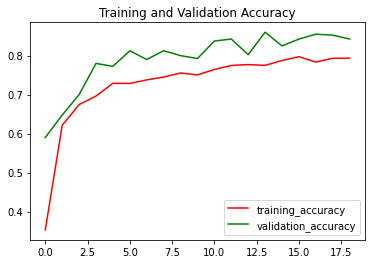

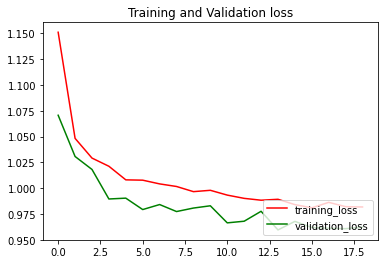

In [124]:
plt.plot(svm1.history['accuracy'],c='r',label='training_accuracy')
plt.plot(svm1.history['val_accuracy'],c='g',label='validation_accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(svm1.history['loss'],c='r',label='training_loss')
plt.plot(svm1.history['val_loss'],c='g',label='validation_loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')
plt.show()

In [125]:
model_path='svm_model.h5'
svm_model=load_model(model_path)

pred1=svm_model.predict_classes(testing_generator)
pred2 = testing_generator.classes

from sklearn.metrics import confusion_matrix
from sklearn import metrics

print(metrics.confusion_matrix(pred2, pred1))
print(metrics.classification_report(pred2, pred1, target_names = ['Afganistan (Class 0)','America (Class 1)', 'Argentina (Class 2)','Bangladesh (Class 3)', 'Bhutan (Class 4)','India (Class 5)', 'Maldives (Class 6)','Nepal (Class 7)', 'Pakistan (Class 8)','Srilanka (Class 9)']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[28  0  0  7  0  2  2  0  0  1]
 [ 5 31  0  0  2  1  0  1  0  0]
 [ 1  1 27  1  1  3  0  2  2  2]
 [ 0  0  0 34  1  2  1  1  1  0]
 [ 0  0  2  0 35  0  0  0  0  3]
 [ 3  0  0  2  1 32  0  0  1  1]
 [ 1  0  0  1  0  0 32  0  0  0]
 [ 3  2  1  6  1  0  0 25  2  0]
 [ 1  0  1  2  0  1  0  1 33  1]
 [ 2  1  0  0  2  1  0  0  0 34]]
                      precision    recall  f1-score   support

Afganistan (Class 0)       0.64      0.70      0.67        40
   America (Class 1)       0.89      0.78      0.83        40
 Argentina (Class 2)       0.87      0.68      0.76        40
Bangladesh (Class 3)       0.64      0.85      0.73        40
    Bhutan (Class 4)       0.81      0.88      0.84        40
     India (Class 5)       0.76      0.80      0.78        40
  Maldives (Class 6)       0.91      0.94      0.93        34
     Nepal (Class 7)       0.83      0.62      0.71        40
  Pakistan (Class 8)       0.85      0.82      0.84        40
  Srilanka (Class 9)       0.81      0.85      0

Using a Pre Trained Model.

In [126]:
from keras.applications.vgg16 import VGG16

img_size = [32, 32]

vgg = VGG16(input_shape = img_size + [3], weights='imagenet', include_top = False)

for layer in vgg.layers:
  layer.trainable = False

In [127]:
from glob import glob
from keras.models import Model

folders = glob('GoodDatasets/training/*')

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

model3 = Model(inputs=vgg.input, outputs=prediction)
monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [128]:
model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [129]:
model3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [130]:
t_data = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
v_data = ImageDataGenerator(rescale=1./255)

In [131]:
t_set = t_data.flow_from_directory(
    'GoodDatasets/training',
    target_size = (32,32),
    batch_size=2,
    class_mode='categorical'
)
v_set = t_data.flow_from_directory(
    'GoodDatasets/validation',
    target_size = (32,32),
    batch_size=2,
    class_mode='categorical'
)

Found 4000 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


In [132]:
r = model3.fit_generator(
    t_set,
    validation_data = v_set,
    epochs = 20,
    steps_per_epoch = nb_train_samples // batch_size,
    validation_steps = nb_val_samples // batch_size,
    callbacks=[monitor]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 8s 15ms/step - loss: 2.1664 - accuracy: 0.2248 - val_loss: 1.7259 - val_accuracy: 0.4300
Epoch 2/20
500/500 [==============================] - 7s 14ms/step - loss: 1.5582 - accuracy: 0.5152 - val_loss: 1.4812 - val_accuracy: 0.5300
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 1.3644 - accuracy: 0.5779 - val_loss: 1.2301 - val_accuracy: 0.6400
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 1.2748 - accuracy: 0.6088 - val_loss: 1.2301 - val_accuracy: 0.6000
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 1.2223 - accuracy: 0.6337 - val_loss: 1.1731 - val_accuracy: 0.6200
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 1.1328 - accuracy: 0.6561 - val_loss: 1.3169 - val_accuracy: 0.5800
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 1.1190 - accuracy: 0.6770 - val_loss: 1.1324 - val_accuracy: 0.6200

Visualizing the pre trained model's accuracy.

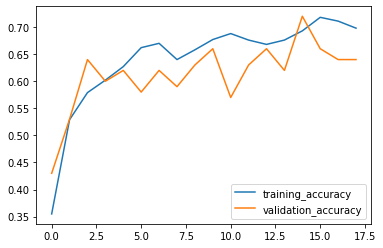

In [133]:
plt.plot(r.history['accuracy'], label='training_accuracy')
plt.plot(r.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.show()
